## 20NEWSGROUP

In [1]:
#Text classification using machine learning Algorithms for 20newsgroup datasets
import pandas as pd
import numpy as np
import sys
import sklearn
from sklearn.datasets import load_files
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import nltk



## training the data

In [2]:
categories = ['alt.atheism','talk.religion.misc','comp.graphics','sci.space','misc.forsale','rec.motorcycles']
data_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)                                                           
data_test = fetch_20newsgroups(subset='test', categories=categories,shuffle=True, random_state=42)
print('data loaded')
target_names = data_train.target_names
print(target_names)
y_train, y_test = data_train.target, data_test.target
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english')
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)

data loaded
['alt.atheism', 'comp.graphics', 'misc.forsale', 'rec.motorcycles', 'sci.space', 'talk.religion.misc']


## Using the function

In [3]:
def benchmark(clf,name):
    print('_' * 80)
    print("Training: ")
	
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
	
    t0 = time() 
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
	
    score = metrics.accuracy_score(y_test, pred)
    kappa=metrics.cohen_kappa_score(y_test,pred)
    print("accuracy:   %0.4f" % score)
    print("\nHamming_loss=%0.4f" %metrics.hamming_loss(y_test,pred))
    print("Kappa Score:   %0.4f" %kappa)
    print("\nprecision score=%0.4f" %metrics.precision_score(y_test,pred,average='macro'))
    print("\nRecall Score=%0.4f" %metrics.recall_score(y_test,pred,average='macro'))
    print("\nF1-Score score=%0.4f" %metrics.f1_score(y_test,pred,average='macro'))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    print()
    print("classification report:")
    print(metrics.classification_report(y_test, pred,target_names=target_names))
    clf_descr = str(clf).split('(')[0]
    class_name =str(name).split('(')[0]
    return class_name, score,train_time, test_time

## Printing The Results

In [4]:
results = []
#RESULTS=[NAME_OF_ALGO ACCURACY TRAIN_TIME TEST-TIME]
for clf, name in ((RidgeClassifier(tol=1e-2, solver="sag"), "Ridge"),
                  (Perceptron(max_iter=50, tol=1e-3),"PPN"),
                  (PassiveAggressiveClassifier(max_iter=50, tol=1e-3),"PA"),
                  (KNeighborsClassifier(n_neighbors=10), "kNN"),
                   (LinearSVC(penalty="l2", dual=False,tol=1e-3),"SVM"),
                   (tree.DecisionTreeClassifier(),"DT"),
                   (MultinomialNB(alpha=.01),"M_NB"),
                   (BernoulliNB(alpha=.01),"B_NB"),
                  (RandomForestClassifier(n_estimators=100), "RF"),
                  (SGDClassifier(alpha=.0001, max_iter=50,penalty="l1"),"SGd"),
                  (NearestCentroid(),"NC"),
                  ##(MLPClassifier(),"MLP")
                 ):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf,name))
#print("ReSuLtS LIST IS",results,end="\n",sep='\n')

indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]
name1, score,training_time, test_time= results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)


Ridge
________________________________________________________________________________
Training: 
train time: 0.725s
test time:  0.005s
accuracy:   0.9220

Hamming_loss=0.0780
Kappa Score:   0.9059

precision score=0.9127

Recall Score=0.9102

F1-Score score=0.9112
confusion matrix:
[[265   2   4   3   7  38]
 [  1 373   6   1   4   4]
 [  0   6 381   1   1   1]
 [  0   0   8 389   1   0]
 [  1  15   6   0 372   0]
 [ 43   3   5   2   4 194]]

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.83      0.84       319
     comp.graphics       0.93      0.96      0.95       389
      misc.forsale       0.93      0.98      0.95       390
   rec.motorcycles       0.98      0.98      0.98       398
         sci.space       0.96      0.94      0.95       394
talk.religion.misc       0.82      0.77      0.80       251

          accuracy                           0.92      2141
         macro avg       0.91      0.91      0.

train time: 6.677s
test time:  0.270s
accuracy:   0.8716

Hamming_loss=0.1284
Kappa Score:   0.8448

precision score=0.8646

Recall Score=0.8551

F1-Score score=0.8575
confusion matrix:
[[248  12   8   2  10  39]
 [  1 362  15   3   7   1]
 [  0  12 373   2   3   0]
 [  0   9  15 371   2   1]
 [  3  21  15   5 350   0]
 [ 53  13  10   3  10 162]]

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.81      0.78      0.79       319
     comp.graphics       0.84      0.93      0.89       389
      misc.forsale       0.86      0.96      0.90       390
   rec.motorcycles       0.96      0.93      0.95       398
         sci.space       0.92      0.89      0.90       394
talk.religion.misc       0.80      0.65      0.71       251

          accuracy                           0.87      2141
         macro avg       0.86      0.86      0.86      2141
      weighted avg       0.87      0.87      0.87      2141

SGd
____________________

## PREDICTING THE MAXIMUM ACURACY AND NAME OF THE ALGORITHM

In [5]:
from copy import*
def scope(word, list, indexes = None):
    result = []
    if not indexes:
        indexes = []
    for index, item in enumerate(list):
        try:
            current_index = indexes + [index]
            result.append(current_index + [item.index(word)])
        except ValueError:
            pass

        if type(item[0]) == type([]):
            indexes.append(index)
            result.extend(scope(word, item, copy(indexes)))

    return result
listObject12=[]
word = max(score)
result = scope(word,results)
algo=result[0]
i=algo[0]
j=algo[1]
k=i-1
print('Maximmum accuracy is by:  ',results[k][j])
print("Maximmum accuracy is :   %0.4f" %max(score))
dataset_name="20 NEWS GROUP"
best_value="BEST_CLF_FROM"
algorithm=results[k][j]
accuracy=max(score)
listObject12.extend((best_value,dataset_name,algorithm,accuracy))
listObject12

Maximmum accuracy is by:   PA
Maximmum accuracy is :   0.9253


['BEST_CLF_FROM', '20 NEWS GROUP', 'PA', 0.9252685660906118]

In [6]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(results, tablefmt='html')))

Ridge,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC
0.9219990658570761,0.9023820644558618,0.9252685660906118,0.848668846333489,0.9248014946286782,0.7183559084539934,0.9112564222326016,0.8939747781410555,0.8715553479682392,0.9042503503035965,0.8860345632881831
0.7247405052185059,0.0743398666381836,0.11558318138122559,0.0049970149993896484,0.6424932479858398,1.8354270458221436,0.018989086151123047,0.02398538589477539,6.676523447036743,0.3227992057800293,0.016990184783935547
0.004999399185180664,0.005995750427246094,0.005995035171508789,0.6974449157714844,0.003998517990112305,0.010993242263793945,0.005997657775878906,0.021986722946166992,0.2698357105255127,0.006000995635986328,0.006043195724487305


In [7]:
display(HTML(tabulate.tabulate([listObject12], tablefmt='html')))

BEST_CLF_FROM,20 NEWS GROUP,PA,0.925269


In [8]:
G_np = np.array(results)
G_np.shape

(4, 11)

In [9]:
g1=G_np.transpose()
df=pd.DataFrame(g1,columns=['NAME_OF_ALGO', 'ACCURACY', 'TRAIN_TIME' ,'TEST_TIME',])
df

,NAME_OF_ALGO,ACCURACY,TRAIN_TIME,TEST_TIME
0,Ridge,0.9219990658570761,0.7247405052185059,0.004999399185180664
1,PPN,0.9023820644558618,0.0743398666381836,0.005995750427246094
2,PA,0.9252685660906118,0.11558318138122559,0.005995035171508789
3,kNN,0.848668846333489,0.0049970149993896484,0.6974449157714844
4,SVM,0.9248014946286782,0.6424932479858398,0.003998517990112305
5,DT,0.7183559084539934,1.8354270458221436,0.010993242263793945
6,M_NB,0.9112564222326016,0.018989086151123047,0.005997657775878906
7,B_NB,0.8939747781410555,0.02398538589477539,0.021986722946166992
8,RF,0.8715553479682392,6.676523447036743,0.2698357105255127
9,SGd,0.9042503503035965,0.3227992057800293,0.006000995635986328


In [10]:
df1=pd.DataFrame(G_np)

In [11]:
pd.DataFrame(listObject12,columns=['final'])

,final
0,BEST_CLF_FROM
1,20 NEWS GROUP
2,PA
3,0.925269


In [12]:
df1['Best Values']=listObject12
df1[0]=['name','acuracy','train',"test"]
df1

,0,1,2,3,4,5,6,7,8,9,10,Best Values
0,name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
1,acuracy,0.9023820644558618,0.9252685660906118,0.848668846333489,0.9248014946286782,0.7183559084539934,0.9112564222326016,0.8939747781410555,0.8715553479682392,0.9042503503035965,0.8860345632881831,20 NEWS GROUP
2,train,0.0743398666381836,0.11558318138122559,0.0049970149993896484,0.6424932479858398,1.8354270458221436,0.018989086151123047,0.02398538589477539,6.676523447036743,0.3227992057800293,0.016990184783935547,PA
3,test,0.005995750427246094,0.005995035171508789,0.6974449157714844,0.003998517990112305,0.010993242263793945,0.005997657775878906,0.021986722946166992,0.2698357105255127,0.006000995635986328,0.006043195724487305,0.925269


In [13]:
final_list=df1.values.tolist()
final_list=np.array(final_list)
display(HTML(tabulate.tabulate(final_list, tablefmt='html')))

name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
acuracy,0.9023820644558618,0.9252685660906118,0.848668846333489,0.9248014946286782,0.7183559084539934,0.9112564222326016,0.8939747781410555,0.8715553479682392,0.9042503503035965,0.8860345632881831,20 NEWS GROUP
train,0.0743398666381836,0.11558318138122559,0.0049970149993896484,0.6424932479858398,1.8354270458221436,0.018989086151123047,0.02398538589477539,6.676523447036743,0.3227992057800293,0.016990184783935547,PA
test,0.005995750427246094,0.005995035171508789,0.6974449157714844,0.003998517990112305,0.010993242263793945,0.005997657775878906,0.021986722946166992,0.2698357105255127,0.006000995635986328,0.006043195724487305,0.9252685660906118


## Plotting the figures

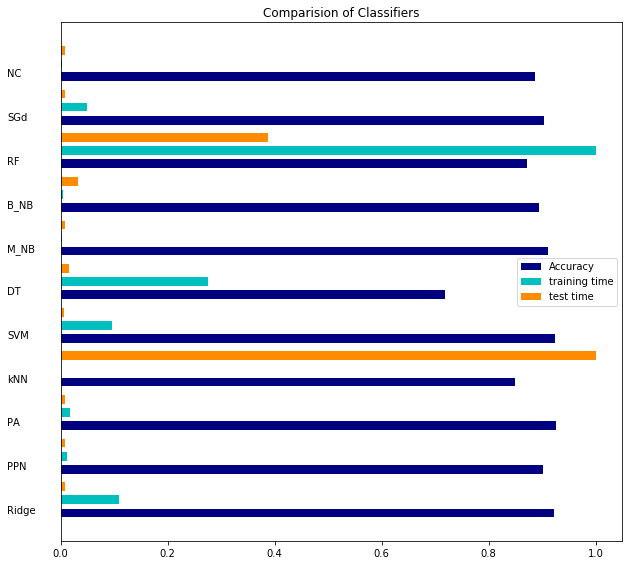

In [14]:
plt.figure(figsize=(12, 8))
plt.title("Comparision of Classifiers")
plt.barh(indices, score, .2, label="Accuracy", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, name1):
    plt.text(-.1, i, c)

plt.show()